In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housepricing/HousePrices_HalfMil.csv


**Reading the Dataset**

In [2]:
df=pd.read_csv("../input/housepricing/HousePrices_HalfMil.csv")
df.head(10)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
5,124,3,3,3,0,1,0,1,1,0,0,1,1,1,1,54300
6,58,1,0,2,0,0,1,0,3,0,1,1,1,0,1,34400
7,249,2,1,1,1,0,0,1,1,0,1,0,1,1,0,50425
8,243,1,0,2,0,0,1,1,1,0,0,0,0,1,0,29575
9,242,1,2,4,0,0,1,0,2,1,0,0,0,1,0,22300


In [3]:
df.info

<bound method DataFrame.info of         Area  Garage  FirePlace  Baths  White Marble  Black Marble  \
0        164       2          0      2             0             1   
1         84       2          0      4             0             0   
2        190       2          4      4             1             0   
3         75       2          4      4             0             0   
4        148       1          4      2             1             0   
...      ...     ...        ...    ...           ...           ...   
499995   128       3          4      2             1             0   
499996    30       2          4      5             0             0   
499997   174       3          3      2             0             1   
499998   121       1          4      5             0             1   
499999    46       2          4      4             1             0   

        Indian Marble  Floors  City  Solar  Electric  Fiber  Glass Doors  \
0                   0       0     3      1         

In [4]:
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

**DATA VISUALIZATION**

In [5]:
import matplotlib.pyplot as plot

<AxesSubplot:ylabel='Frequency'>

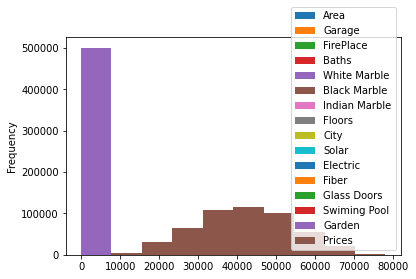

In [6]:
df.plot.hist()

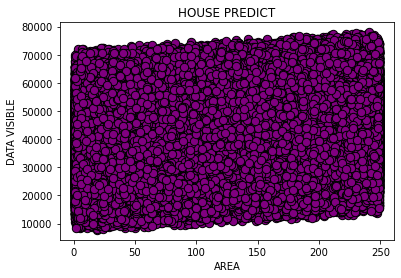

In [7]:
X = df['Area']
y = df['Prices']
plot.scatter(X,y,c='purple', edgecolor='Black', s=70)
plot.xlabel('AREA')
plot.ylabel('DATA VISIBLE')
plot.title('HOUSE PREDICT')
plot.show()

In [8]:
import seaborn as sns

In [9]:
corrmat = df.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

NameError: name 'plt' is not defined

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


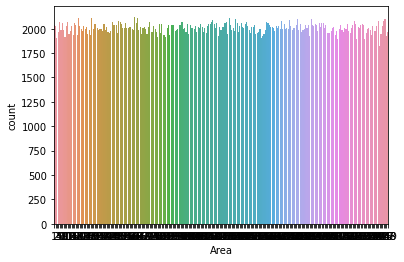

In [10]:
sns.countplot(df.Area)
plot.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


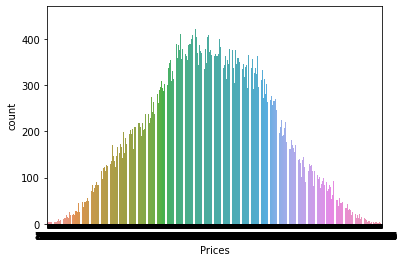

In [11]:
sns.countplot(df.Prices)
plot.show()

<AxesSubplot:xlabel='Area', ylabel='Prices'>

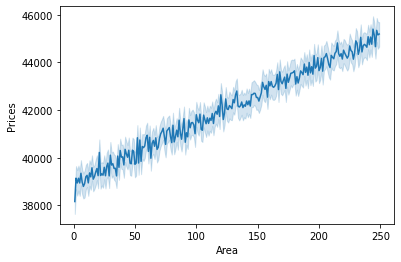

In [12]:
sns.lineplot(x = df["Area"] , y = df["Prices"])

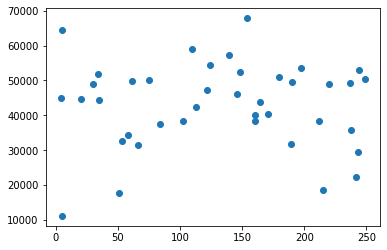

In [13]:
plot.scatter(df['Area'].head(40),df['Prices'].head(40))

**To Perform Linear regression**

I take two dataframes such as Price & Area

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,median_absolute_error

In [15]:
x=df[["Area"]]
y=df[["Prices"]]

In [16]:
x

,Area
0,164
1,84
2,190
3,75
4,148
...,...
499995,128
499996,30
499997,174
499998,121


In [17]:
y

,Prices
0,43800
1,37550
2,49500
3,50075
4,52400
...,...
499995,55900
499996,29250
499997,51350
499998,62725


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [19]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(335000, 1) (165000, 1) (335000, 1) (165000, 1)


In [20]:
regressor=LinearRegression(normalize=True)
regressor.fit(x_train ,y_train)

LinearRegression(normalize=True)

In [21]:
regressor.coef_

array([[25.03576495]])

In [22]:
regressor.intercept_

array([38919.66725486])

In [23]:
y_pred=regressor.predict(x_test)
y_pred

array([[42174.31669789],
       [40221.52703207],
       [39245.13219916],
       ...,
       [39069.88184454],
       [44327.39248328],
       [39345.27525895]])

In [24]:
y_test

,Prices
352806,38200
417824,16800
469847,54325
407746,48400
469848,38075
...,...
110594,21900
318477,40900
11964,27900
75386,17150


In [25]:
matches = (y_pred==y_test)
print(matches.sum())

Prices    0
dtype: int64


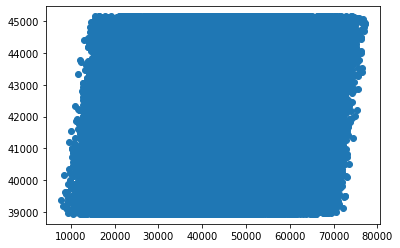

In [26]:
plot.scatter(y_test,y_pred)

We perform Total dataframes in the linear regression model 

In [27]:
x=df[["Area","Garage","FirePlace","Baths","White Marble","Black Marble","Indian Marble","Floors","City","Solar","Electric","Fiber","Glass Doors","Swiming Pool","Garden"]]
y=df[["Prices"]]

In [28]:
x

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0


In [29]:
y

,Prices
0,43800
1,37550
2,49500
3,50075
4,52400
...,...
499995,55900
499996,29250
499997,51350
499998,62725


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(335000, 15) (165000, 15) (335000, 1) (165000, 1)


In [31]:
regressor=LinearRegression(normalize=True)
regressor.fit(x_train ,y_train)

LinearRegression(normalize=True)

In [32]:
regressor.coef_

array([[ 2.50000000e+01,  1.50000000e+03,  7.50000000e+02,
         1.25000000e+03,  7.67311067e+03, -1.32688933e+03,
        -6.32688933e+03,  1.50000000e+04,  3.50000000e+03,
         2.50000000e+02,  1.25000000e+03,  1.17500000e+04,
         4.45000000e+03,  6.00891265e-12, -1.55880405e-12]])

In [33]:
regressor.intercept_

array([7326.88933177])

In [34]:
y_pred=regressor.predict(x_test)
y_pred

array([[38200.],
       [16800.],
       [54325.],
       ...,
       [27900.],
       [17150.],
       [46175.]])

In [35]:
y_test

,Prices
352806,38200
417824,16800
469847,54325
407746,48400
469848,38075
...,...
110594,21900
318477,40900
11964,27900
75386,17150


In [36]:
matches = (y_pred==y_test)
print(matches.sum())

Prices    37245
dtype: int64


In [37]:
print(len(matches))

165000


In [38]:
matches.sum() / float(len(matches))

Prices    0.225727
dtype: float64

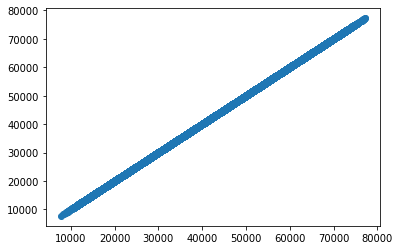

In [39]:
plot.scatter(y_test,y_pred)